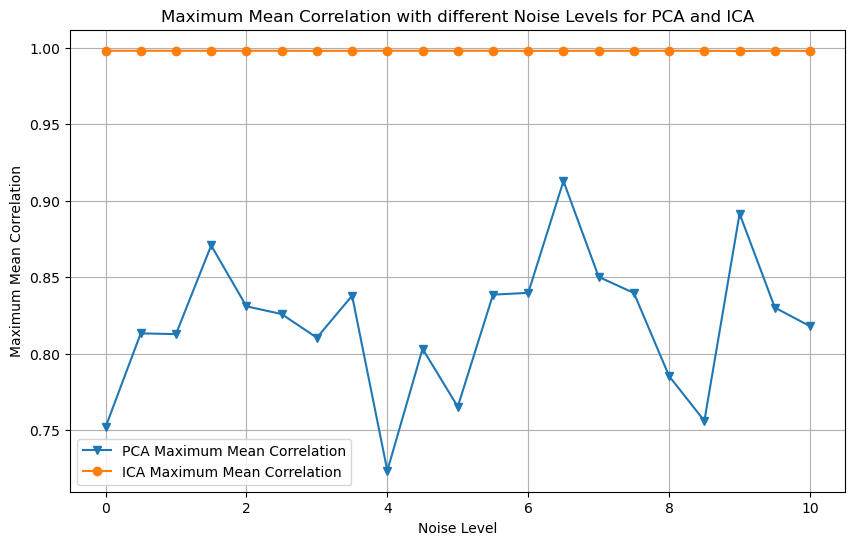

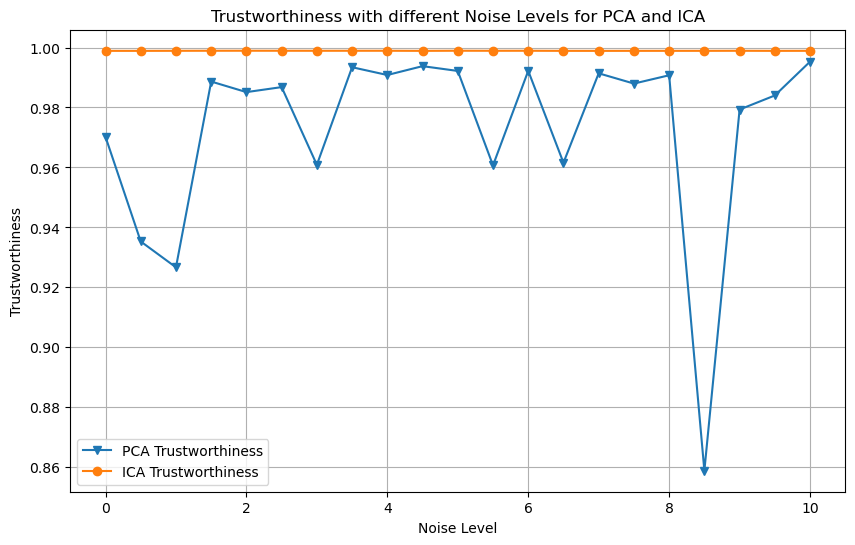

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.optimize import linear_sum_assignment
from sklearn.manifold import trustworthiness

def generate_signals(t, noise_level):
    n = np.random.normal(0, 1, len(t))
    f1 = np.sin(t) + 0.001 * n * noise_level
    f2 = 2 * (t - np.floor(t)) + 0.002 * n * noise_level
    f3 = 0.01 * t + 0.001 * n * noise_level
    return np.vstack((f1, f2, f3))

def max_correlation(true, estimated):
    corr_matrix = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            corr_matrix[i, j] = abs(pearsonr(true[i], estimated[j])[0])
    
    row_ind, col_ind = linear_sum_assignment(-corr_matrix)
    max_corr = [corr_matrix[row, col] for row, col in zip(row_ind, col_ind)]
    return max_corr

pca_correlations = []
ica_correlations = []
pca_trust = []
ica_trust = []
noise_levels = np.linspace(0, 10, 21)

for level in noise_levels:
    t = np.linspace(0, 100, 1000)
    A = np.random.rand(3, 3)
    f = generate_signals(t, level)
    x = A @ f
    x = x.T

    pca = PCA(n_components=3)
    ica = FastICA(n_components=3,whiten='unit-variance')

    pca_transformed = pca.fit_transform(x).T
    ica_transformed = ica.fit_transform(x).T

    corr_pca = max_correlation(f, pca_transformed)
    corr_ica = max_correlation(f, ica_transformed)
    
    trust_pca = trustworthiness(f.T, pca_transformed.T)
    trust_ica = trustworthiness(f.T, ica_transformed.T)

    pca_correlations.append(np.mean(corr_pca))
    ica_correlations.append(np.mean(corr_ica))
    
    pca_trust.append(trust_pca)
    ica_trust.append(trust_ica)

plt.figure(figsize=(10, 6))
plt.plot(noise_levels, pca_correlations, label='PCA Maximum Mean Correlation',marker="v")
plt.plot(noise_levels, ica_correlations, label='ICA Maximum Mean Correlation',marker="o")

plt.xlabel('Noise Level')
plt.ylabel('Maximum Mean Correlation')
plt.title('Maximum Mean Correlation with different Noise Levels for PCA and ICA')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(noise_levels, pca_trust, label='PCA Trustworthiness',marker="v")
plt.plot(noise_levels, ica_trust, label='ICA Trustworthiness',marker="o")

plt.xlabel('Noise Level')
plt.ylabel('Trustworthiness')
plt.title('Trustworthiness with different Noise Levels for PCA and ICA')
plt.legend()
plt.grid()
plt.show()


/Users/robinthielking/miniconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Download of Fashion-MNIST successful


/Users/robinthielking/miniconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Download of one-hundred-plants-margin Dataset successful


/Users/robinthielking/miniconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Download of isolet Dataset successful
Starting PCA training
PCA training finished
Starting ICA training


/Users/robinthielking/miniconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/robinthielking/miniconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/robinthielking/miniconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


ICA training finished
Starting LDA training
LDA training finished
Starting UMAP training, this may take a while


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


UMAP training finished
Starting T-SNE training, this may take a while
T-SNE training finished
Beginning Plotting


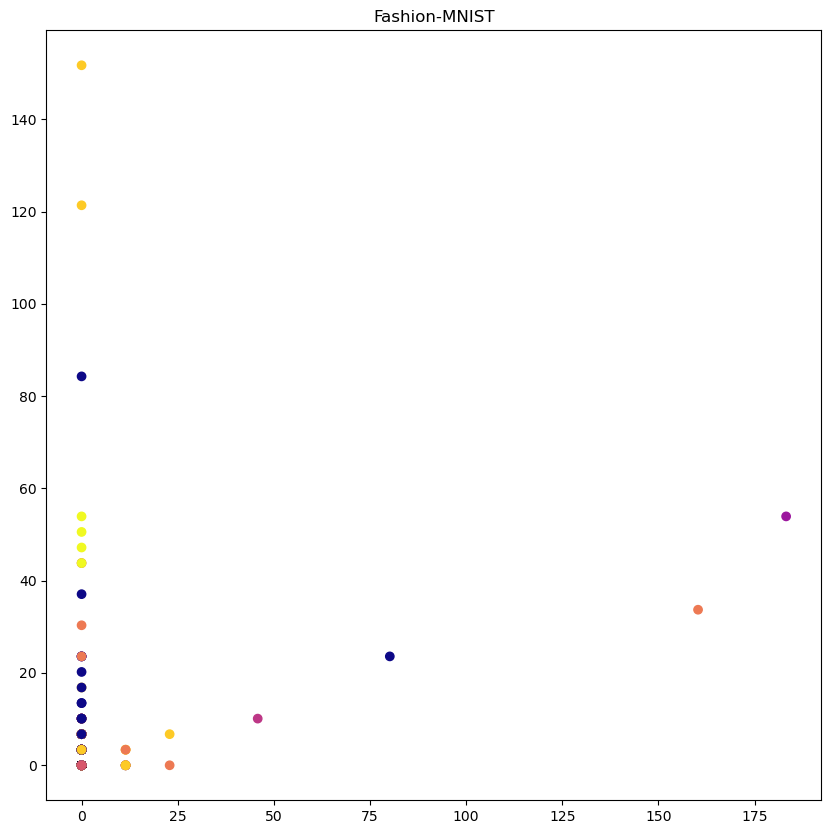

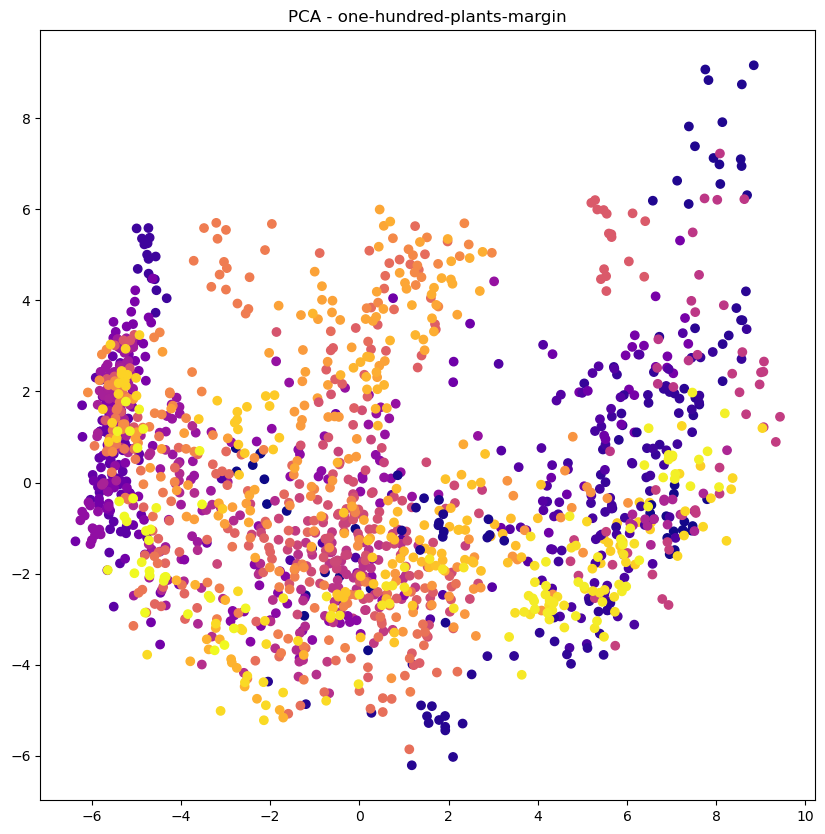

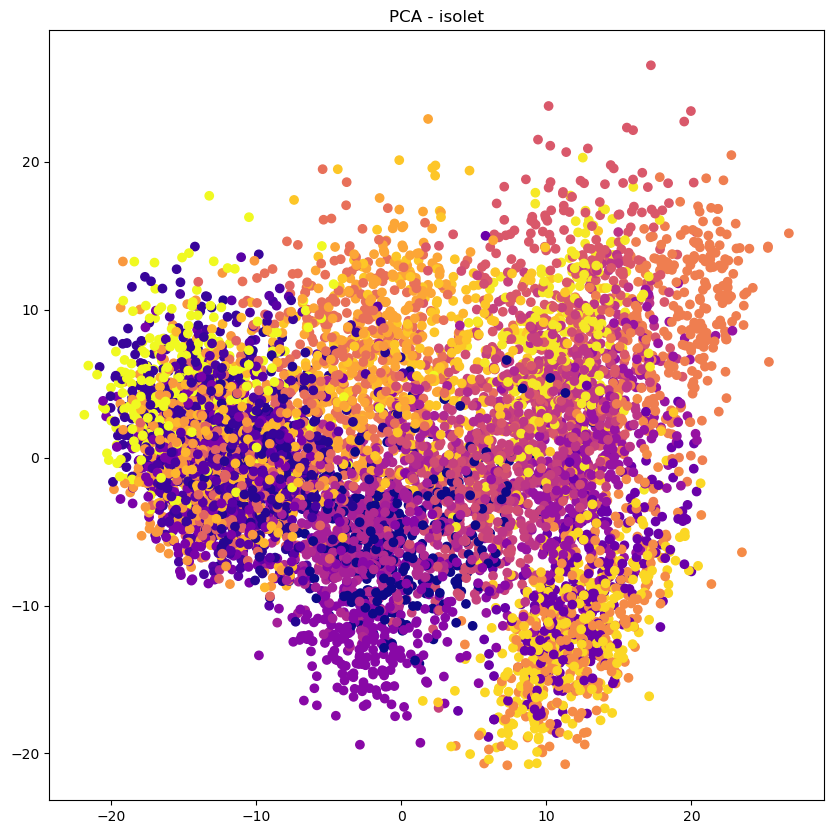

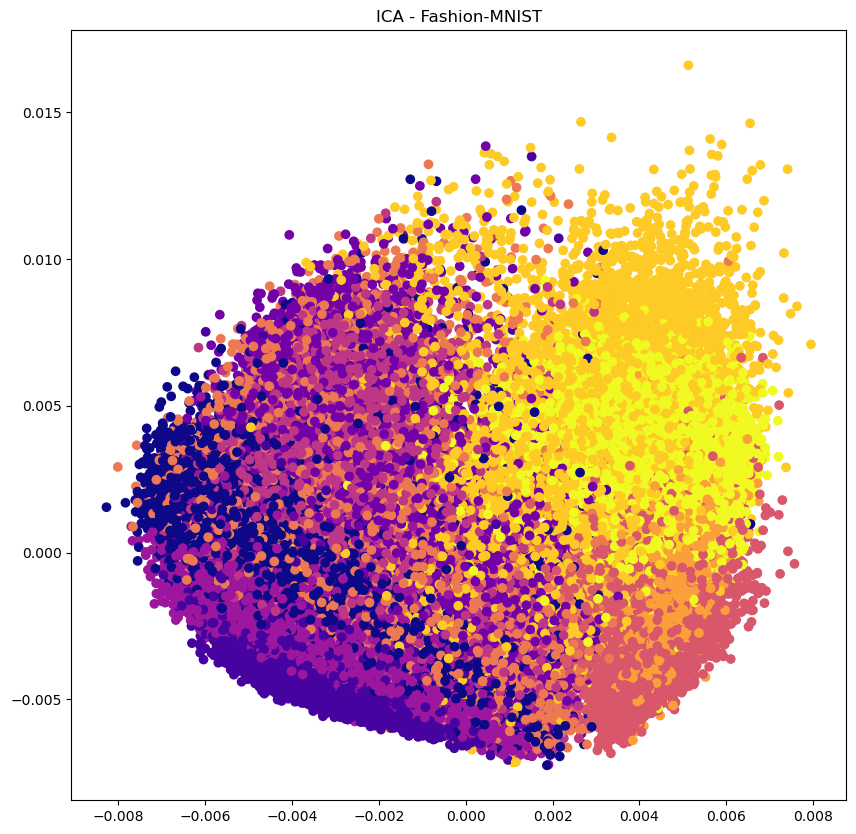

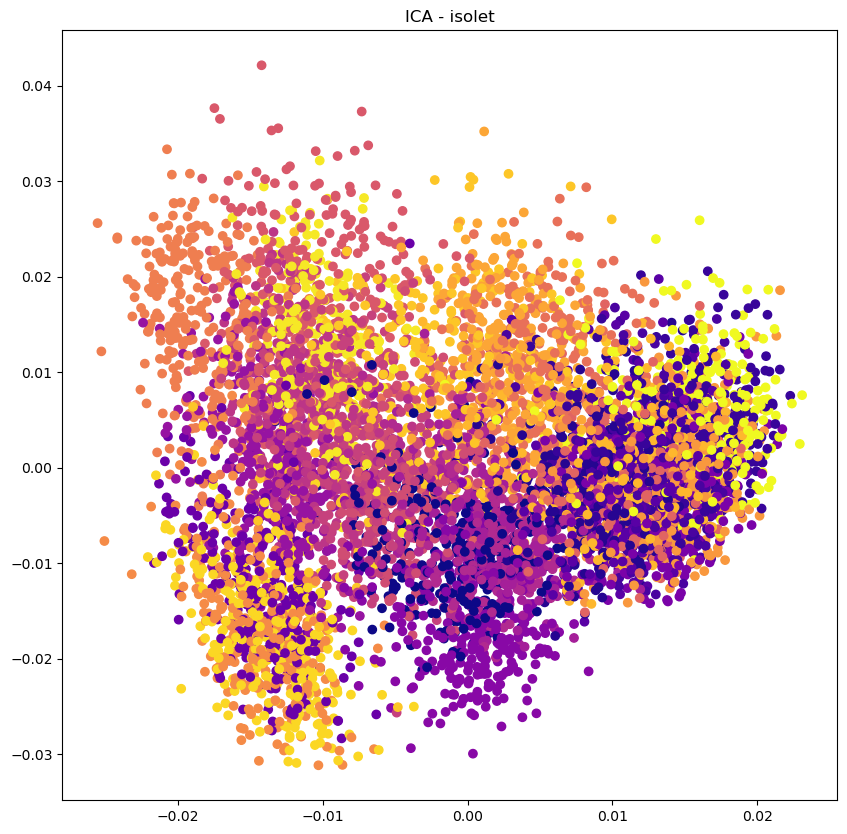

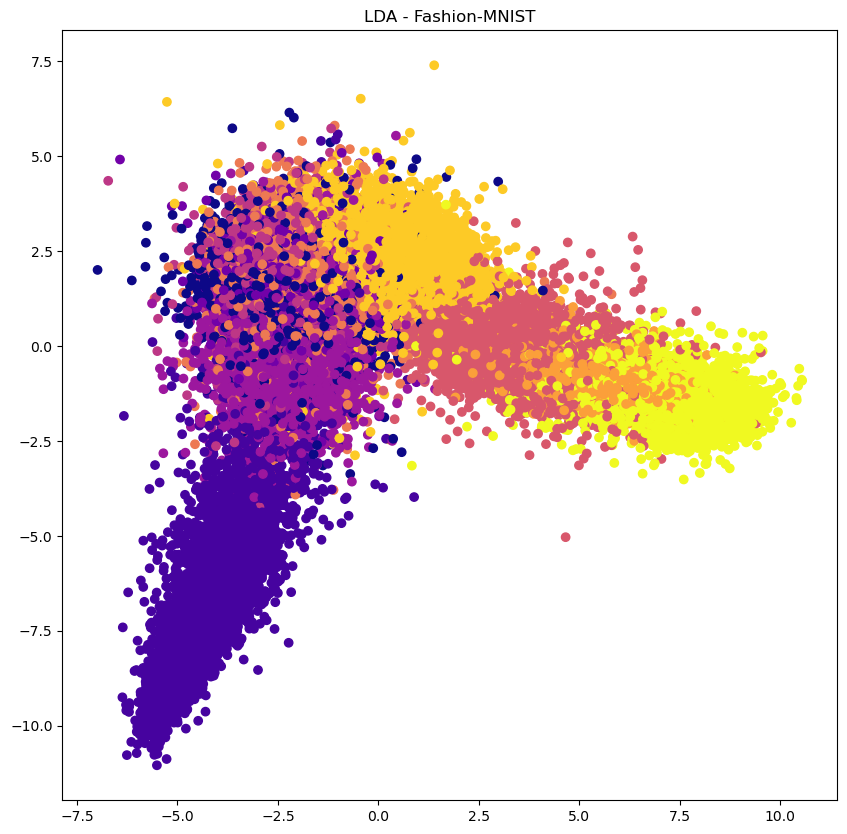

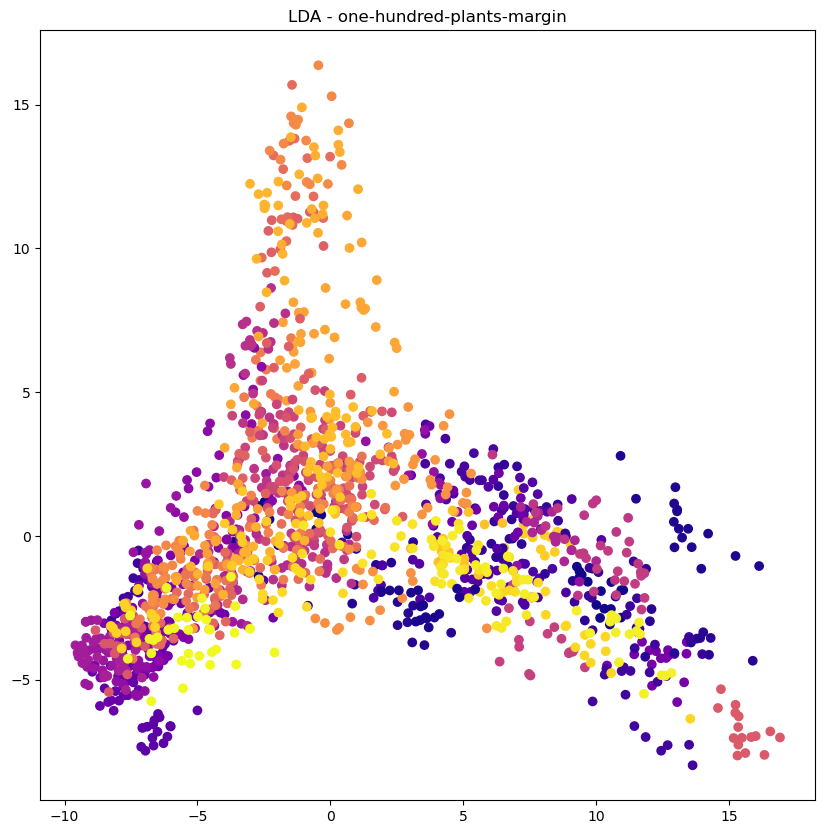

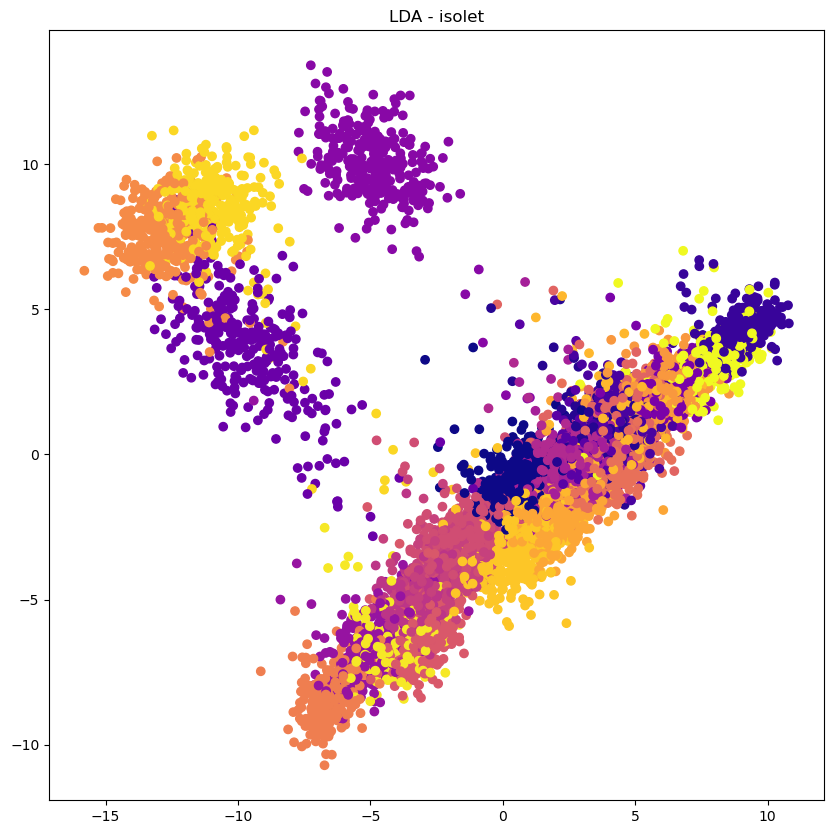

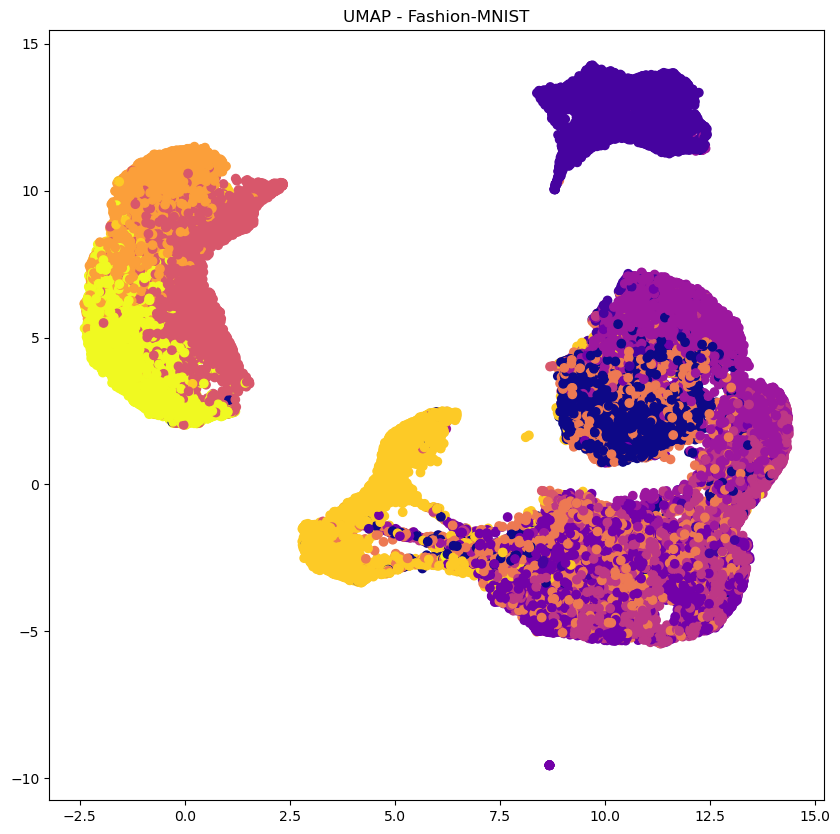

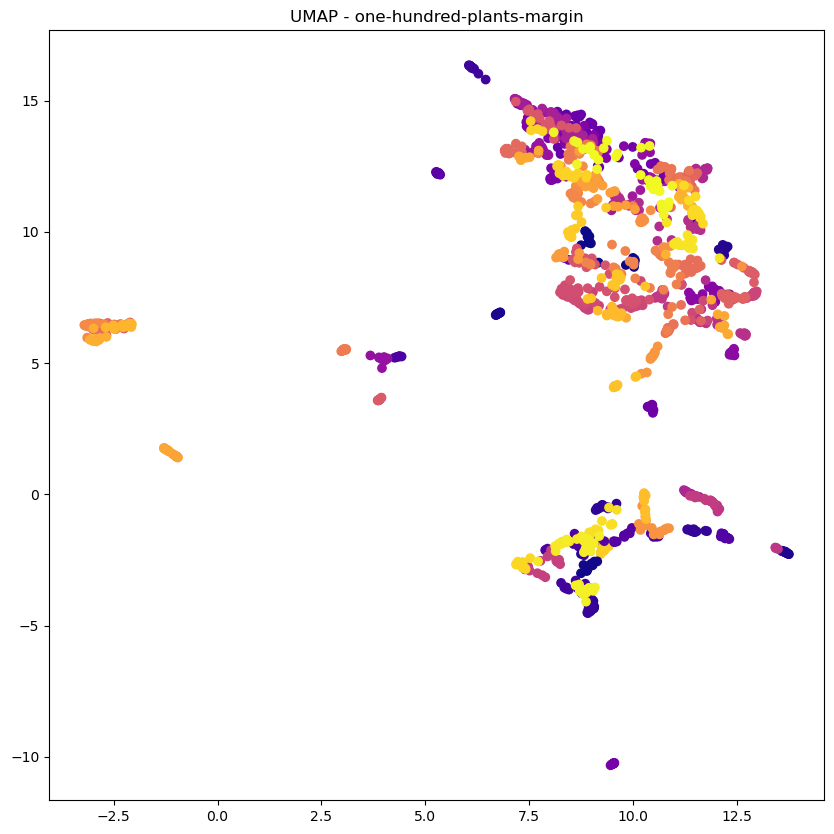

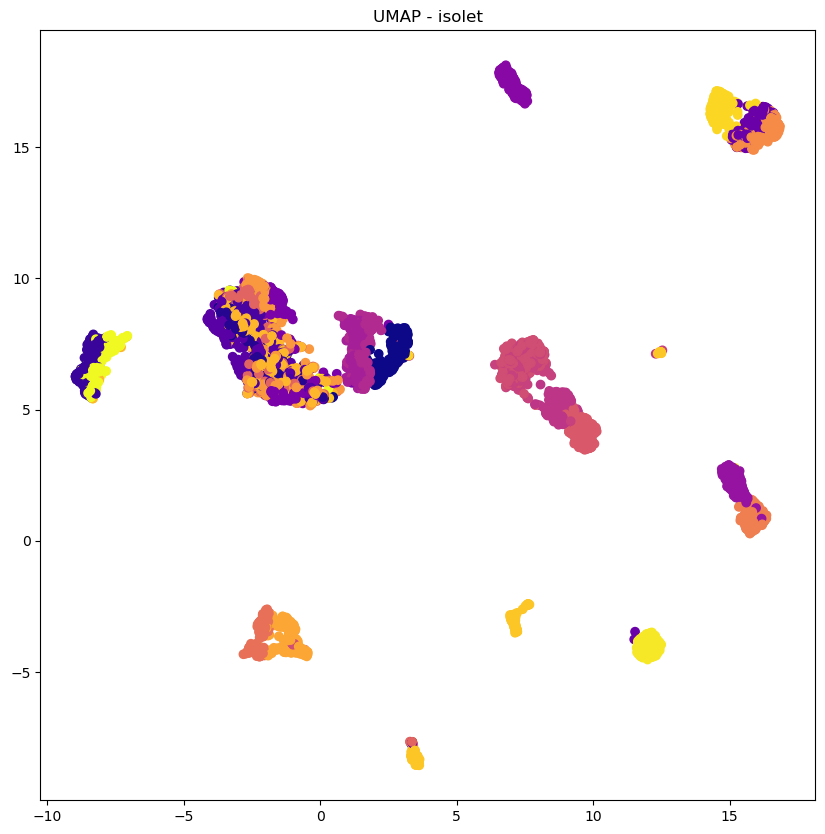

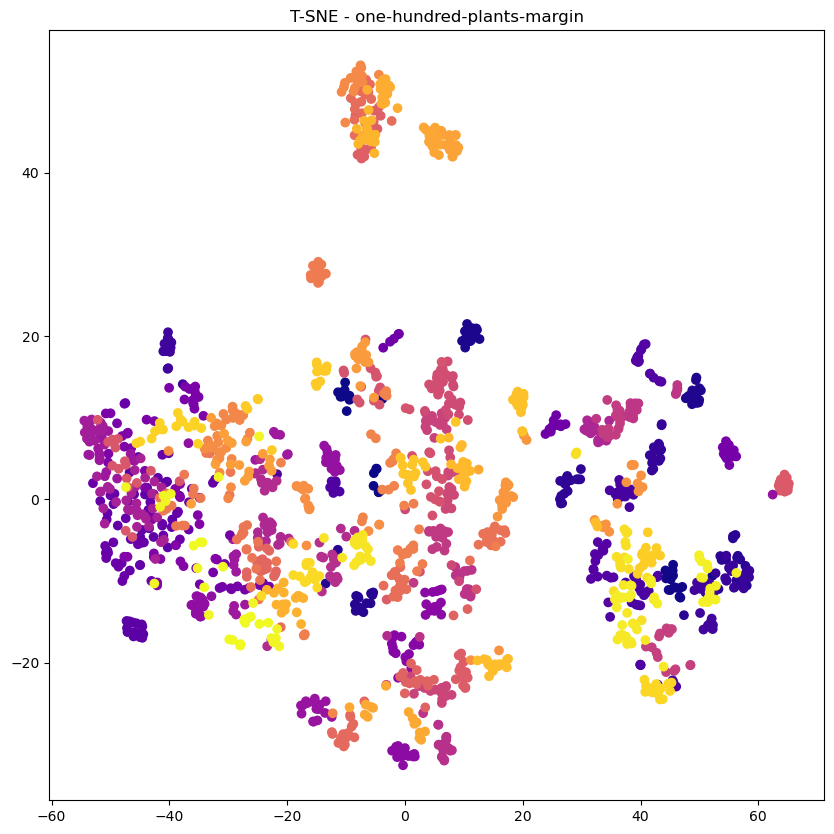

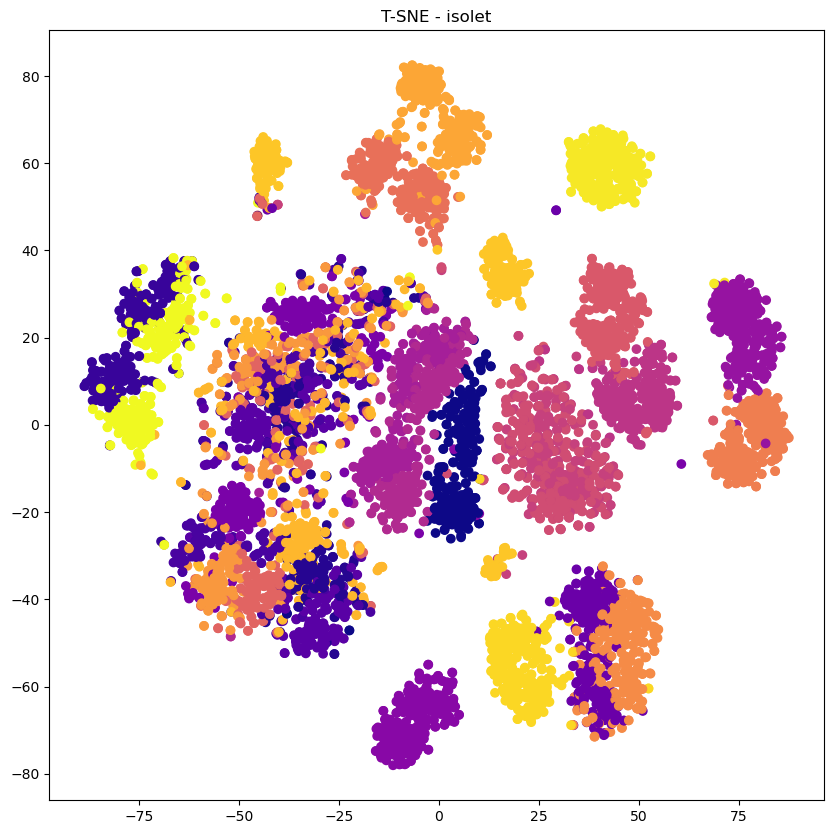

Finished Plotting
Beginning evaluation
Trustworthiness with Fashion-MNIST: PCA=0.9113958333333333, FastICA=0.9096458333333334, LDA=0.8771979166666667, T-SNE=0.9304635416666667, UMAP=0.9373958333333333
Trustworthiness with one-hundred-plants-margin: PCA=0.8881302083333333, FastICA=0.8800625, LDA=0.9931770833333333, T-SNE=0.9716927083333333, UMAP=0.951796875
Trustworthiness with Isolet: PCA=0.798328125, FastICA=0.8016822916666667, LDA=0.918234375, T-SNE=0.9478697916666666, UMAP=0.9484479166666666
Finished evaluation


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap as up
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.datasets import fetch_covtype, fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE, trustworthiness
from sklearn.utils import resample
#Preparation
##Fashion-MNIST
fdata = fetch_openml(name = 'fashion-mnist')
print("Download of Fashion-MNIST successful")
ftargetFrame = fdata['target'].to_frame().T
fdf = pd.DataFrame(fdata['data'], columns=fdata['feature_names'])
fscaler = StandardScaler()
fscaler.fit(fdf)
fscaled_data = fscaler.transform(fdf)

##Satellite
sdata = fetch_openml(name = 'one-hundred-plants-margin', version=1)
print("Download of one-hundred-plants-margin Dataset successful")
stargetFrame = sdata['target'].to_frame().T
sdf = pd.DataFrame(sdata['data'], columns=sdata['feature_names'])
sscaler = StandardScaler()
sscaler.fit(sdf)
sscaled_data = sscaler.transform(sdf)

##Credit-g
cdata = fetch_openml('isolet', version=1)
print("Download of isolet Dataset successful")
ctargetFrame = cdata['target'].to_frame().T
cdf = pd.DataFrame(cdata['data'], columns=cdata['feature_names'])
cscaler = StandardScaler()
cscaler.fit(cdf)
cscaled_data = cscaler.transform(cdf)


#Begin of training Phase
print("Starting PCA training")
fpca = PCA(n_components=2)
fpca.fit(fscaled_data)
pcad_fdata = fpca.transform(fscaled_data)

spca = PCA(n_components=2)
spca.fit(sscaled_data)
pcad_sdata = spca.transform(sscaled_data)

cpca = PCA(n_components=2)
cpca.fit(cscaled_data)
pcad_cdata = cpca.transform(cscaled_data)
print("PCA training finished")

print("Starting ICA training")
fica = FastICA(n_components=2)
fica.fit(fscaled_data)
icad_fdata = fica.transform(fscaled_data)

sica = FastICA(n_components=2)
sica.fit(sscaled_data)
icad_sdata = sica.transform(sscaled_data)

cica = FastICA(n_components=2)
cica.fit(cscaled_data)
icad_cdata = cica.transform(cscaled_data)
print("ICA training finished")

print("Starting LDA training")
flda = LinearDiscriminantAnalysis()
flda.fit(fscaled_data, fdata['target'])
lda_fdata = flda.transform(fscaled_data)

slda = LinearDiscriminantAnalysis()
slda.fit(sscaled_data, sdata['target'])
lda_sdata = slda.transform(sscaled_data)

clda = LinearDiscriminantAnalysis( )
clda.fit(cscaled_data, cdata['target'])
lda_cdata = clda.transform(cscaled_data)
print("LDA training finished")

print("Starting UMAP training, this may take a while")
freducer = up.UMAP(n_components=2)
ump_fdata = freducer.fit_transform(fscaled_data)

sreducer = up.UMAP(n_components=2)
ump_sdata = sreducer.fit_transform(sscaled_data)

creducer = up.UMAP(n_components=2)
ump_cdata = creducer.fit_transform(cscaled_data)
print("UMAP training finished")

print("Starting T-SNE training, this may take a while")
ftsn = TSNE(n_components=2)
tsn_fdata = ftsn.fit_transform(fscaled_data)

stsn = TSNE(n_components=2)
tsn_sdata = stsn.fit_transform(sscaled_data)

ctsn = TSNE(n_components=2)
tsn_cdata = ctsn.fit_transform(cscaled_data)
print("T-SNE training finished")


#Plotting Phase
print("Beginning Plotting")

plt.figure(figsize=(10, 10))
plt.title("Fashion-MNIST")
plt.scatter(fscaled_data[:, 0], fscaled_data[:, 1], c=ftargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("one-hundred-plants-margin")
plt.scatter(sscaled_data[:, 0], sscaled_data[:, 1], c=stargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("isolet")
plt.scatter(cscaled_data[:, 0], cscaled_data[:, 1], c=ctargetFrame, cmap='plasma')
plt.show()


plt.figure(figsize=(10, 10))
plt.title("PCA - Fashion-MNIST")
plt.scatter(pcad_fdata[:, 0], pcad_fdata[:, 1], c=ftargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("PCA - one-hundred-plants-margin")
plt.scatter(pcad_sdata[:, 0], pcad_sdata[:, 1], c=stargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("PCA - isolet")
plt.scatter(pcad_cdata[:, 0], pcad_cdata[:, 1], c=ctargetFrame, cmap='plasma')
plt.show()


plt.figure(figsize=(10, 10))
plt.title("ICA - Fashion-MNIST")
plt.scatter(icad_fdata[:, 0], icad_fdata[:, 1], c=ftargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("ICA - one-hundred-plants-margin")
plt.scatter(icad_sdata[:, 0], icad_sdata[:, 1], c=stargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("ICA - isolet")
plt.scatter(icad_cdata[:, 0], icad_cdata[:, 1], c=ctargetFrame, cmap='plasma')
plt.show()


plt.figure(figsize=(10, 10))
plt.title("LDA - Fashion-MNIST")
plt.scatter(lda_fdata[:, 0], lda_fdata[:, 1], c=ftargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("LDA - one-hundred-plants-margin")
plt.scatter(lda_sdata[:, 0], lda_sdata[:, 1], c=stargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("LDA - isolet")
plt.scatter(lda_cdata[:, 0], lda_cdata[:, 1], c=ctargetFrame, cmap='plasma')
plt.show()


plt.figure(figsize=(10, 10))
plt.title("UMAP - Fashion-MNIST")
plt.scatter(ump_fdata[:, 0], ump_fdata[:, 1], c=ftargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("UMAP - one-hundred-plants-margin")
plt.scatter(ump_sdata[:, 0], ump_sdata[:, 1], c=stargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("UMAP - isolet")
plt.scatter(ump_cdata[:, 0], ump_cdata[:, 1], c=ctargetFrame, cmap='plasma')
plt.show()


plt.figure(figsize=(10, 10))
plt.title("T-SNE - Fashion-MNIST")
plt.scatter(tsn_fdata[:, 0], tsn_fdata[:, 1], c=ftargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("T-SNE - one-hundred-plants-margin")
plt.scatter(tsn_sdata[:, 0], tsn_sdata[:, 1], c=stargetFrame, cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("T-SNE - isolet")
plt.scatter(tsn_cdata[:, 0], tsn_cdata[:, 1], c=ctargetFrame, cmap='plasma')
plt.show()

print("Finished Plotting")

##I am resampling the data because the original dataset is too large
print("Beginning evaluation")
mres = resample(fscaled_data, n_samples= 200, random_state=345789)
ores = resample(sscaled_data, n_samples= 200, random_state=345789)
ires = resample(cscaled_data, n_samples= 200, random_state=345789)

m_pca_res = resample(pcad_fdata, n_samples= 200, random_state=345789)
o_pca_res = resample(pcad_sdata, n_samples= 200, random_state=345789)
i_pca_res = resample(pcad_cdata, n_samples= 200, random_state=345789)

m_ica_res = resample(icad_fdata, n_samples= 200, random_state=345789)
o_ica_res = resample(icad_sdata, n_samples= 200, random_state=345789)
i_ica_res = resample(icad_cdata, n_samples= 200, random_state=345789)

m_lda_res = resample(lda_fdata, n_samples= 200, random_state=345789)
o_lda_res = resample(lda_sdata, n_samples= 200, random_state=345789)
i_lda_res = resample(lda_cdata, n_samples= 200, random_state=345789)

m_umap_res = resample(ump_fdata, n_samples= 200, random_state=345789)
o_umap_res = resample(ump_sdata, n_samples= 200, random_state=345789)
i_umap_res = resample(ump_cdata, n_samples= 200, random_state=345789)

m_tsne_res = resample(tsn_fdata, n_samples= 200, random_state=345789)
o_tsne_res = resample(tsn_sdata, n_samples= 200, random_state=345789)
i_tsne_res = resample(tsn_cdata, n_samples= 200, random_state=345789)

pcaf_trust = trustworthiness(mres, m_pca_res)
pcas_trust = trustworthiness(ores, o_pca_res)
pcac_trust = trustworthiness(ires, i_pca_res)

icaf_trust = trustworthiness(mres, m_ica_res)
icas_trust = trustworthiness(ores, o_ica_res)
icac_trust = trustworthiness(ires, i_ica_res)

ldaf_trust = trustworthiness(mres, m_lda_res)
ldas_trust = trustworthiness(ores, o_lda_res)
ldac_trust = trustworthiness(ires, i_lda_res)

umapf_trust = trustworthiness(mres, m_umap_res)
umaps_trust = trustworthiness(ores, o_umap_res)
umapc_trust = trustworthiness(ires, i_umap_res)

tsnef_trust = trustworthiness(mres, m_tsne_res)
tsnes_trust = trustworthiness(ores, o_tsne_res)
tsnec_trust = trustworthiness(ires, i_tsne_res)


print("Trustworthiness with Fashion-MNIST: PCA=" + str(pcaf_trust) + ", FastICA=" + str(icaf_trust) + ", LDA=" + str(ldaf_trust) + ", T-SNE=" + str(tsnef_trust) + ", UMAP=" + str(umapf_trust))
print("Trustworthiness with one-hundred-plants-margin: PCA=" + str(pcas_trust) + ", FastICA=" + str(icas_trust) + ", LDA=" + str(ldas_trust) + ", T-SNE=" + str(tsnes_trust) + ", UMAP=" + str(umaps_trust))
print("Trustworthiness with Isolet: PCA=" + str(pcac_trust) + ", FastICA=" + str(icac_trust) + ", LDA=" + str(ldac_trust) + ", T-SNE=" + str(tsnec_trust) + ", UMAP=" + str(umapc_trust))
print("Finished evaluation")
